In [2]:
import sys, os
sys.path.append('C:\\Users\Quentin\\Documents\\ALMA_CHILI\\gaia-shock\\src')

## directory
rootdir = r'C:\Users\Quentin\Documents\ALMA_CHILI'
wdir    = r'%s\products'%(rootdir)
#notedir = r'%s\gaia-shock\notebooks_Quentin'%(rootdir)

os.chdir(wdir)  # to change the current directory

import gaia_utils_quentin as gu

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [6]:
name_list = ["M67", "NGC2516", "NGC752", "NGC1039", "NGC1342", "NGC1647", "NGC1912"]

clustername = "NGC2516"
RADIUS       = 6.0
errtol       = 0.01
distmax      = 600
dump_to_file = True

## Read the data and do the conversion

source = gu.source(clustername, RADIUS, errtol)
source.query(dump_to_file,distmax)
#source.read_votable(voname)
source.convert_filter_data(without_mag=True)

SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),                                      CIRCLE('ICRS',119.5167000000,-60.7533000000,6.0000000000)) = 1                                      AND abs(pmra_error/pmra)<  0.010000  AND abs(pmdec_error/pmdec)< 0.0100000000                                     AND abs(parallax_error/parallax)< 0.0100000000                                     AND 1000./parallax < 600.0;
## NGC2516-6.0deg-0.01err.vot created
## Query for NGC2516 done
## Total stars: 11453
## Density star per pc^3: 0.00458

## Conversion done...
## Stars selected: 11390


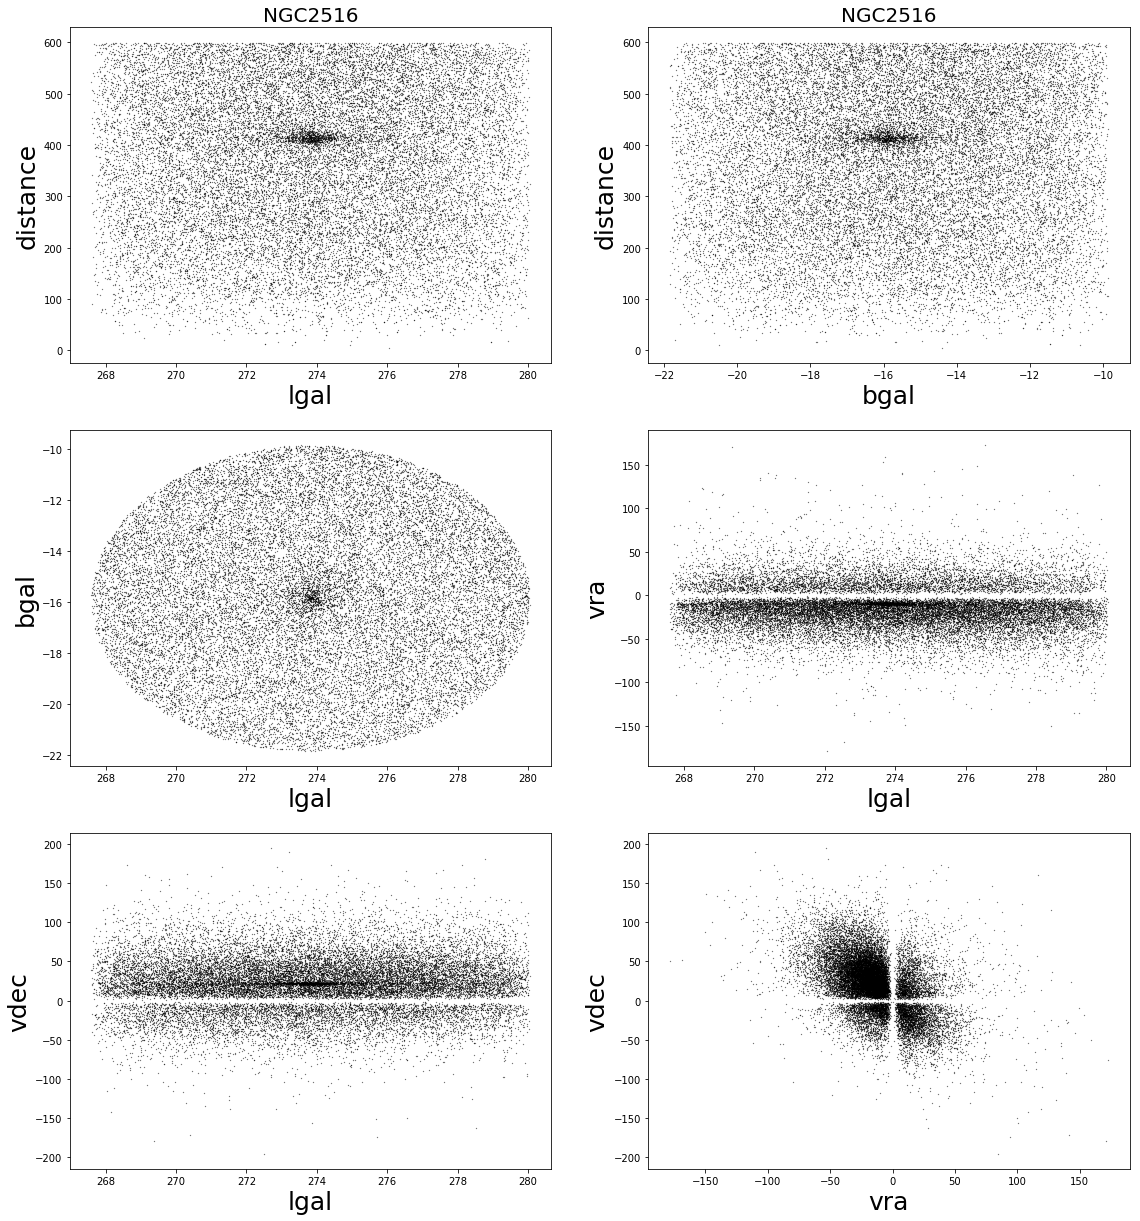

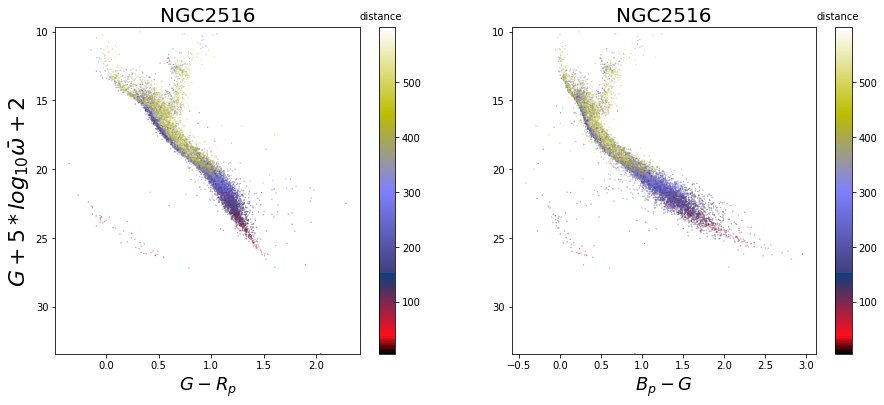

In [4]:
source.plot_information(size=0.05)

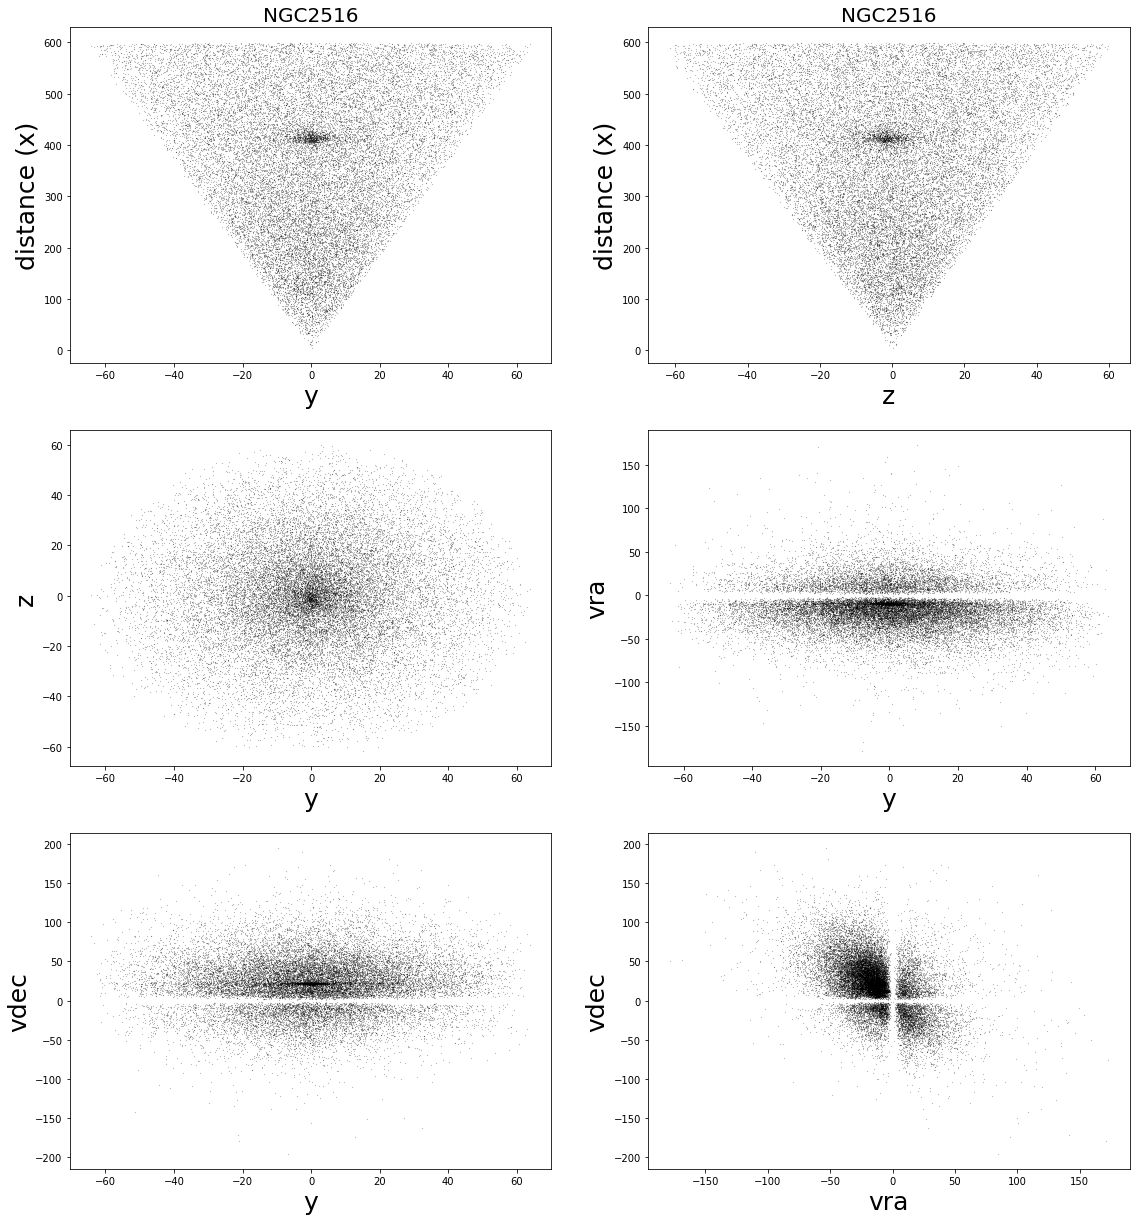

In [5]:
source.convert_to_cartesian()
source.plot_information(size=0.01,cartesian=True, HRD=False)

SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),                                      CIRCLE('ICRS',81.5250000000,16.7000000000,6.0000000000)) = 1                                      AND abs(pmra_error/pmra)<  0.020000  AND abs(pmdec_error/pmdec)< 0.0200000000                                     AND abs(parallax_error/parallax)< 0.0200000000                                     AND 1000./parallax < 500.0;
Query finished.
## Query for Collinder 65 done
## Total stars: 9110
## Density star per pc^3: 0.00630

## Conversion done...
## Stars selected: 9031


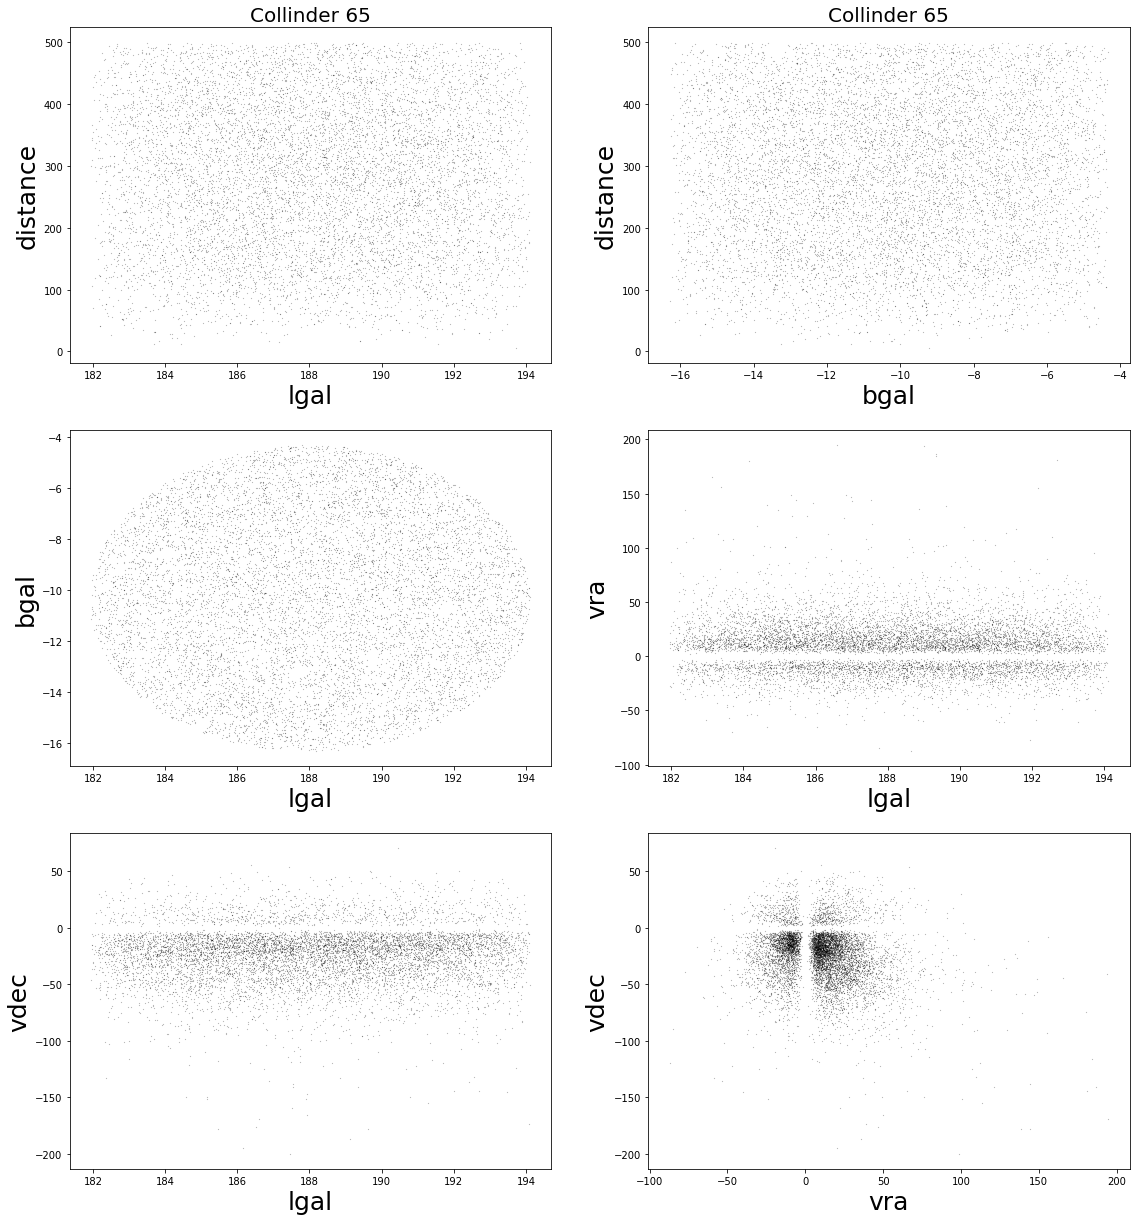

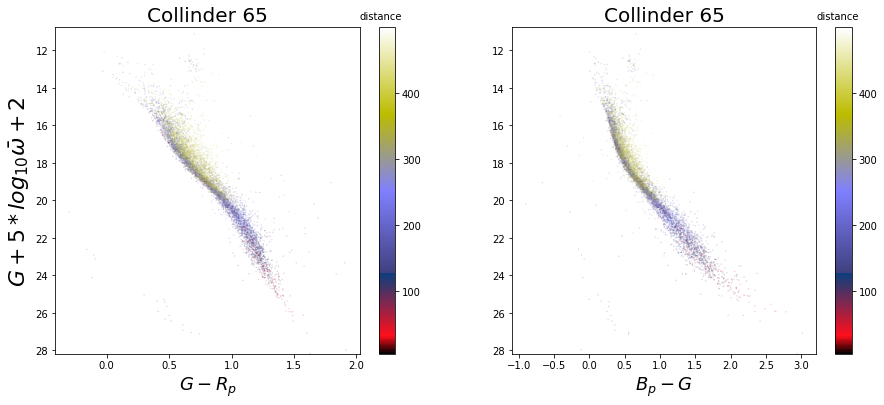

SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),                                      CIRCLE('ICRS',55.5500000000,33.4330000000,7.0000000000)) = 1                                      AND abs(pmra_error/pmra)<  0.020000  AND abs(pmdec_error/pmdec)< 0.0200000000                                     AND abs(parallax_error/parallax)< 0.0200000000                                     AND 1000./parallax < 550.0;
Query finished.
## Query for Per OB2 done
## Total stars: 12770
## Density star per pc^3: 0.00486

## Conversion done...
## Stars selected: 12700


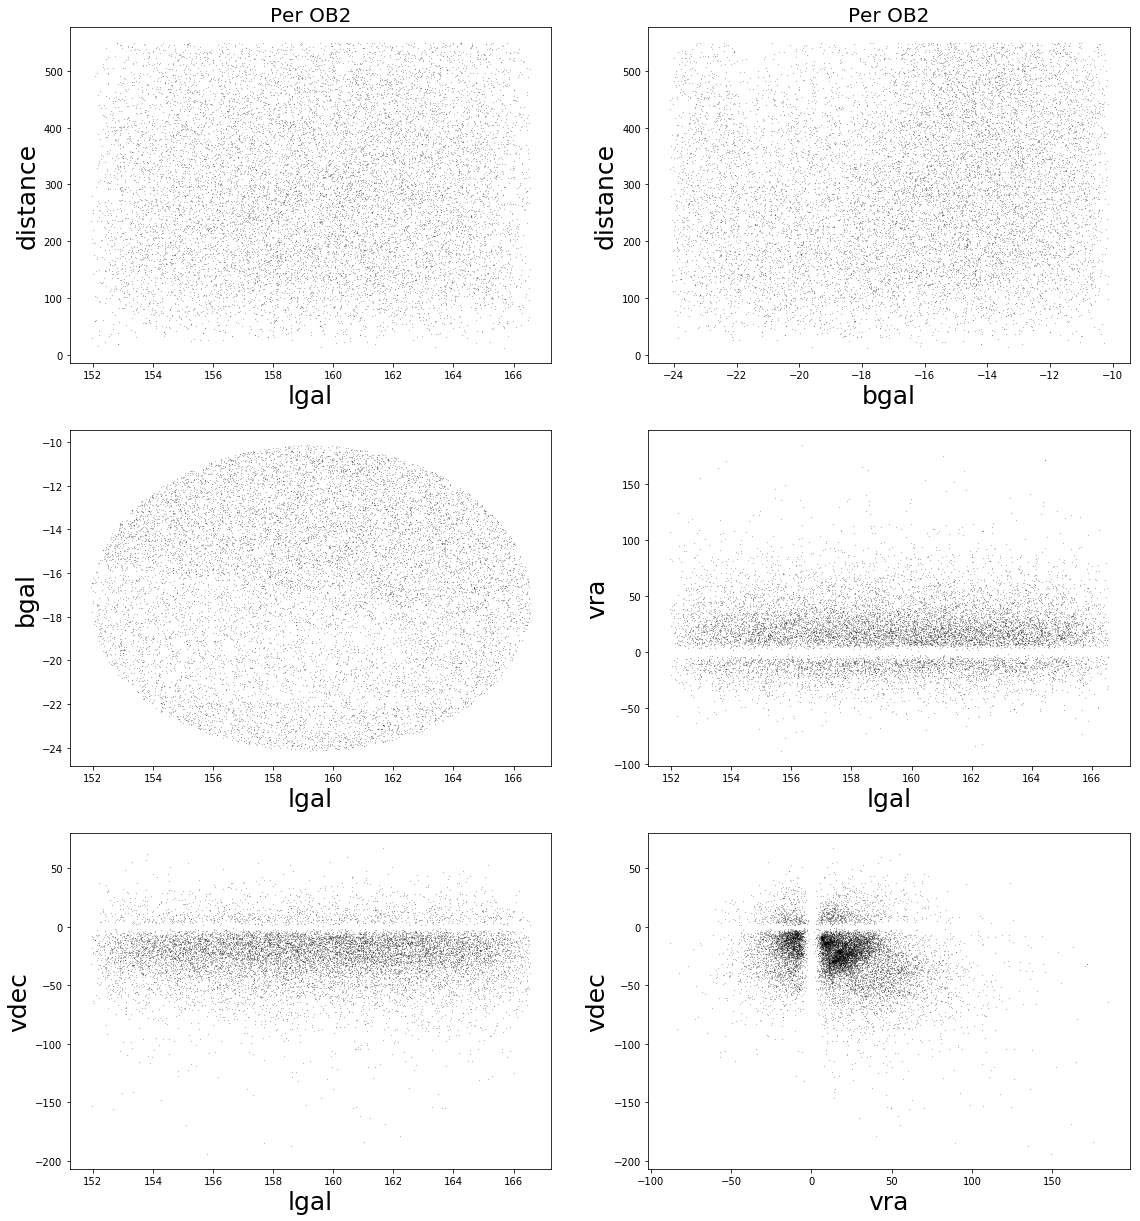

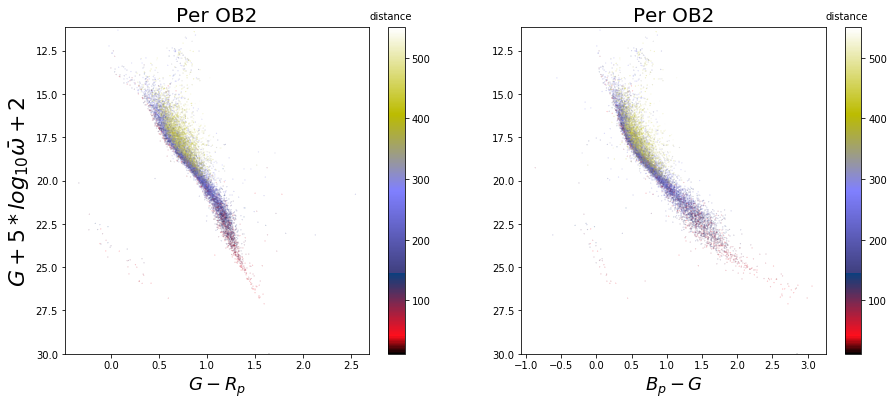

SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),                                      CIRCLE('ICRS',93.8583000000,3.8450000000,5.0000000000)) = 1                                      AND abs(pmra_error/pmra)<  0.020000  AND abs(pmdec_error/pmdec)< 0.0200000000                                     AND abs(parallax_error/parallax)< 0.0200000000                                     AND 1000./parallax < 500.0;
Query finished.
## Query for Platais 6 done
## Total stars: 6701
## Density star per pc^3: 0.00669

## Conversion done...
## Stars selected: 6647


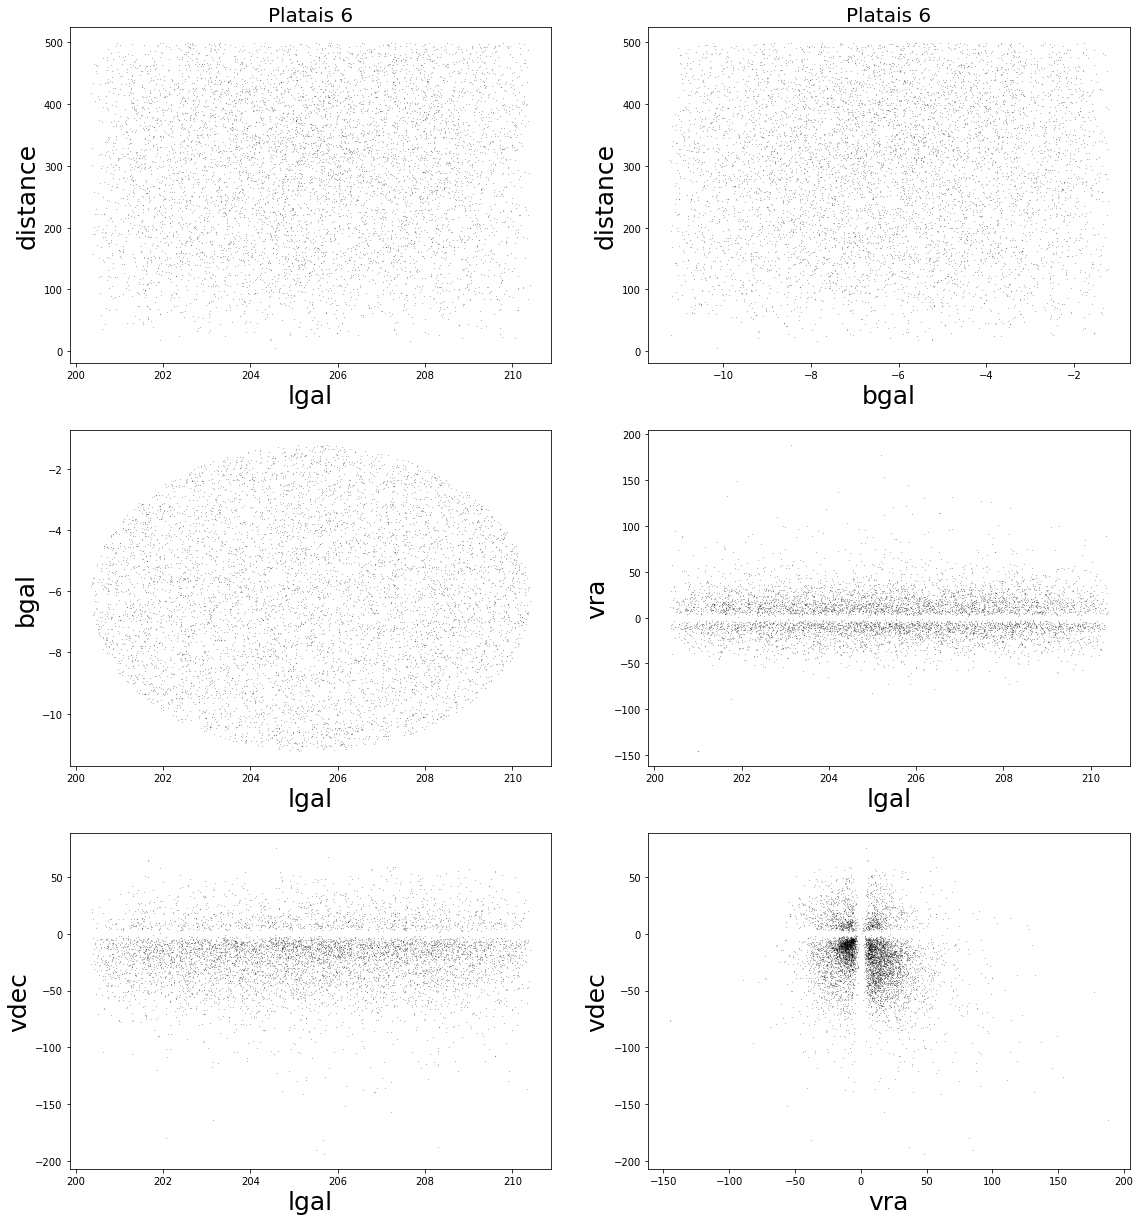

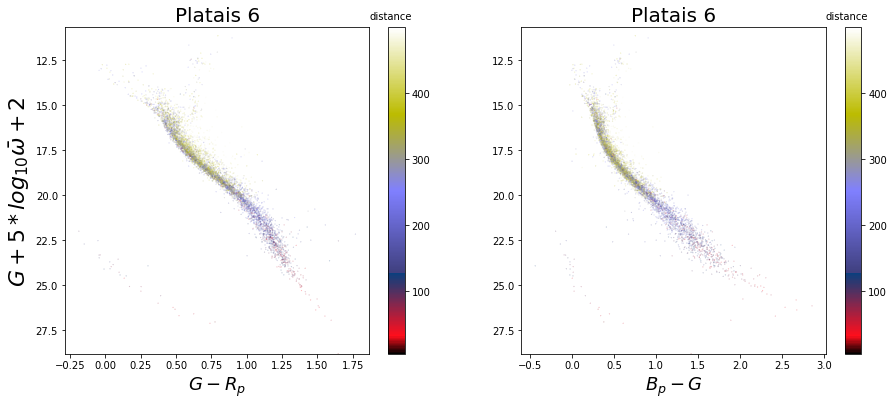

In [7]:
## Read the data and do the conversion
# NGC6625, Collinder107, NGC2252, NGC2682, Collinder65, Collinder21, NGC6811, Turner 5, Sco OB4, NGC 2548
errtol=0.02
dump_to_file = False
tab_source = []
for clustername, RADIUS, distmax in zip(["Collinder 65","Per OB2","Platais 6"],[6.0,7.0,5.0],[500,550,500]) :
    source = gu.source(clustername, RADIUS, errtol)
    source.query(dump_to_file,distmax)
    #source.read_votable(voname)
    source.convert_filter_data(without_mag=True)
    source.plot_information(size=0.01)
    tab_source.append(source)

In [ ]:
source.plot_information(size=0.1)

In [ ]:
source.convert_to_cartesian()
source.plot_information(size=0.01,cartesian=True)

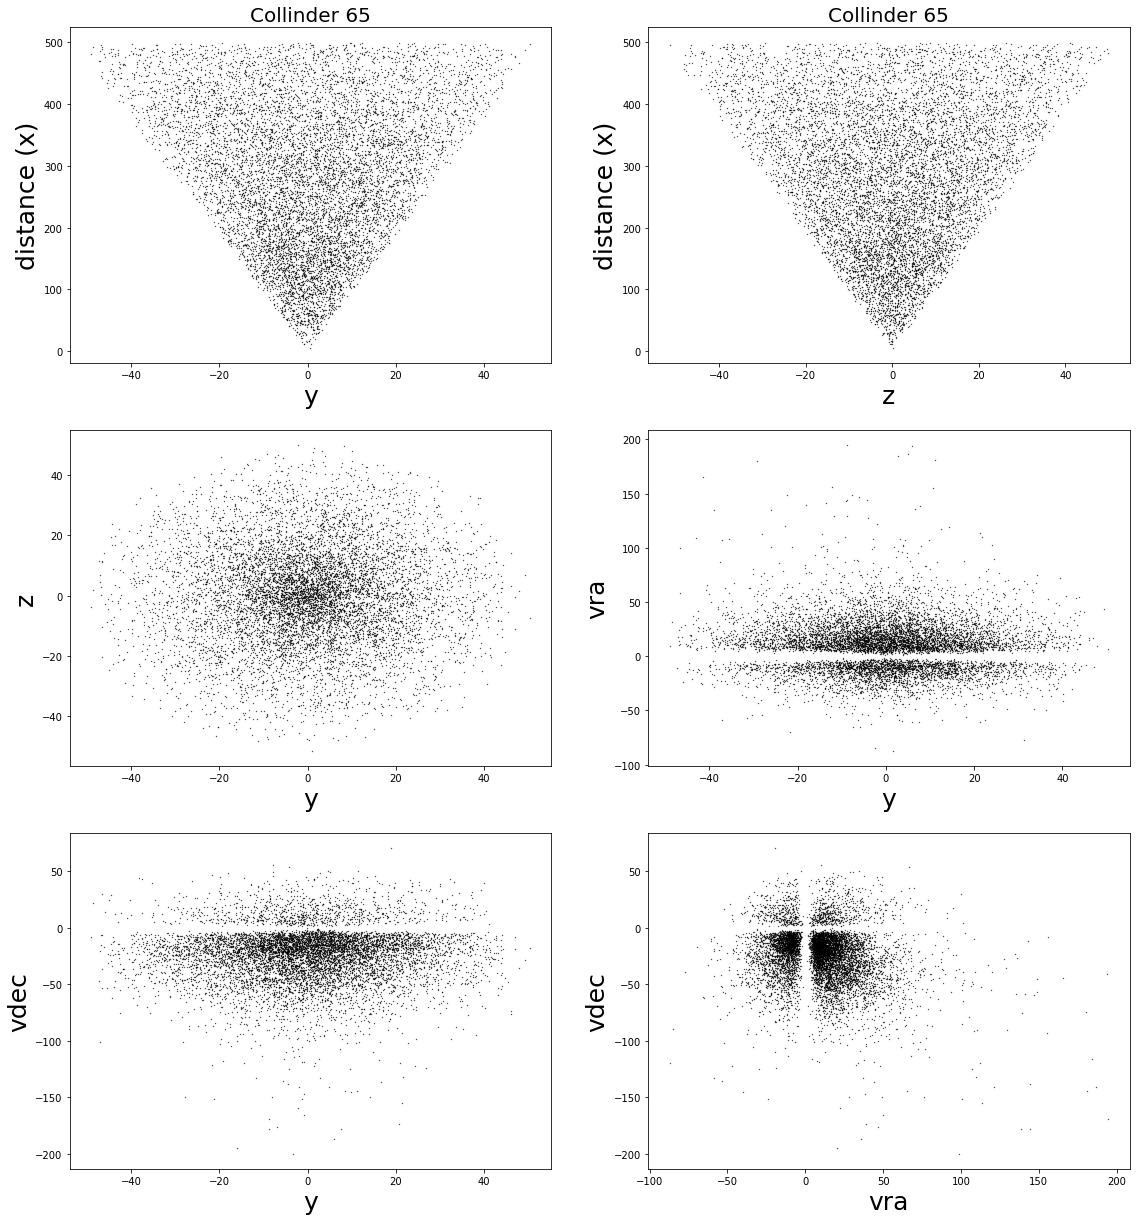

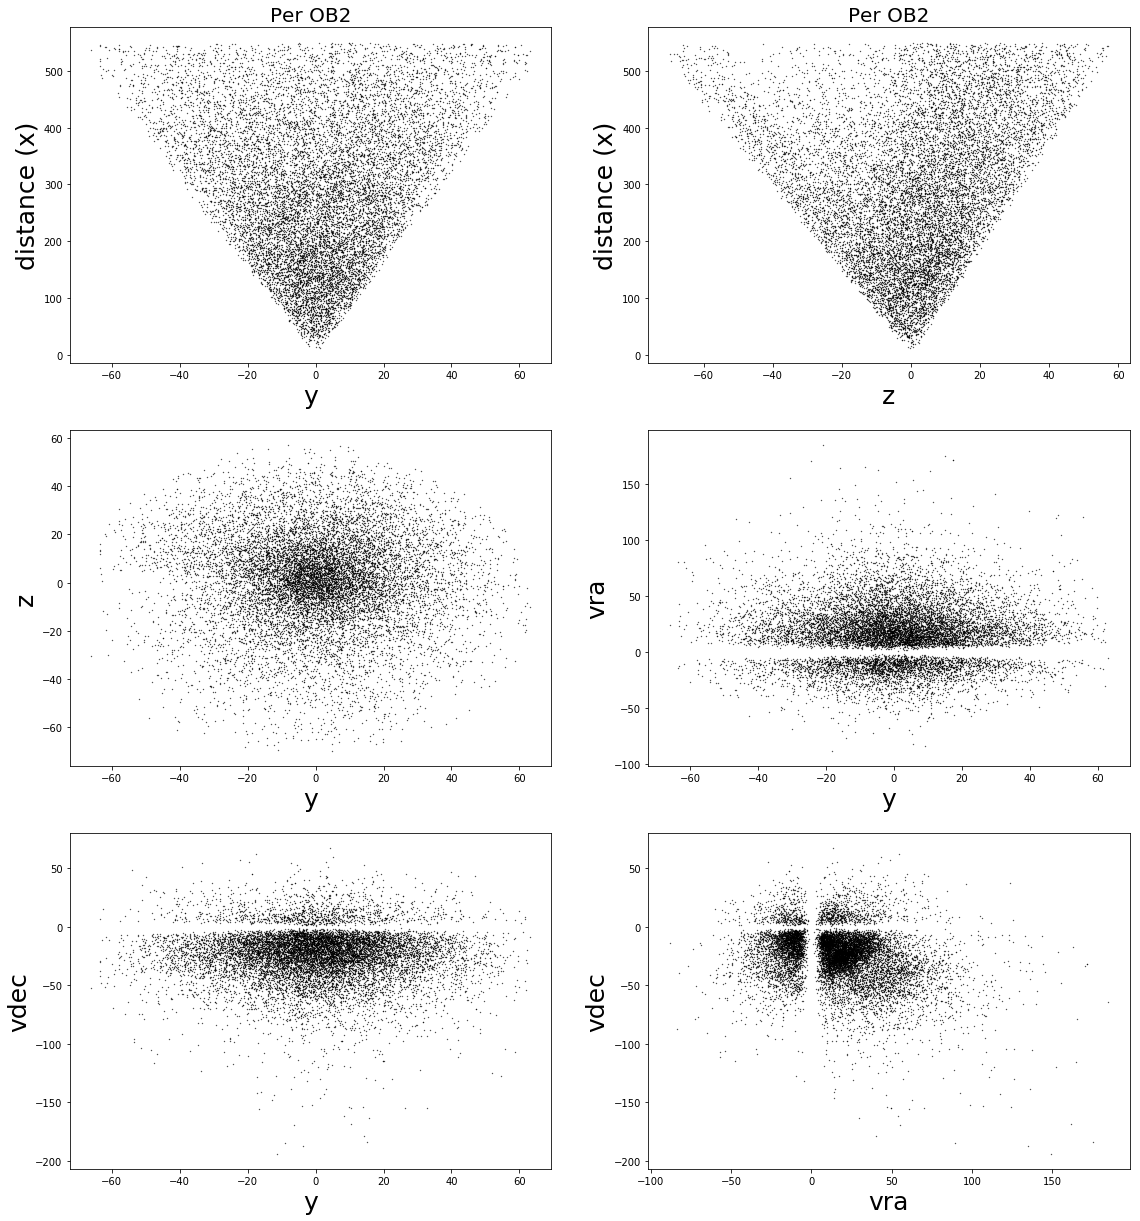

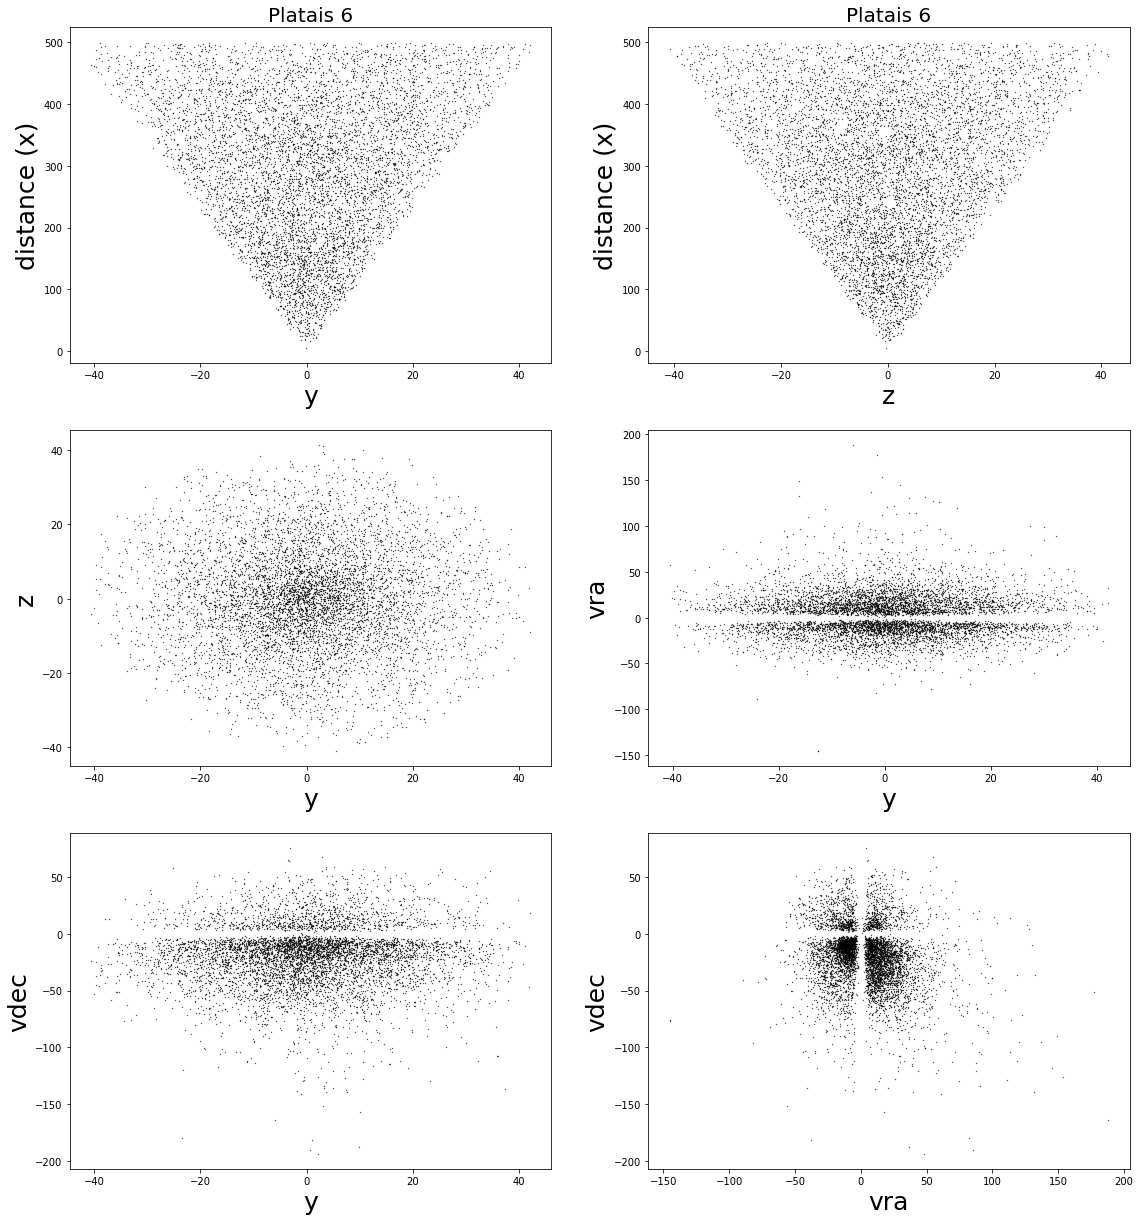

In [11]:
for i in range(len(tab_source)) :
    #tab_source[i].convert_to_cartesian()
    tab_source[i].plot_information(size=0.1,cartesian=True,HRD=False)